In [1]:
##Kazi Tahsinul Haque## Quant Intern Task

#importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import scipy.optimize as spop
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


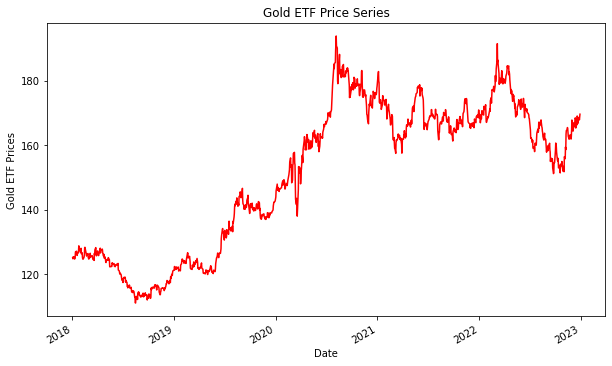

                                Close
Date                                 
2018-01-02 00:00:00-05:00  125.150002
2018-01-03 00:00:00-05:00  124.820000
2018-01-04 00:00:00-05:00  125.459999
2018-01-05 00:00:00-05:00  125.330002
2018-01-08 00:00:00-05:00  125.309998


In [2]:
#Downloading and plotting the daily prices of Gold for the last 5 years
Dfg = yf.download('GLD', '2018-01-01', '2023-01-01', auto_adjust = True)

Dfg = Dfg[['Close']] #selecting only the closing prices

Dfg = Dfg.dropna() #dropping the missing values

Dfg.Close.plot(figsize=(10, 6), color= 'r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()
print(Dfg.head())

[*********************100%***********************]  1 of 1 completed


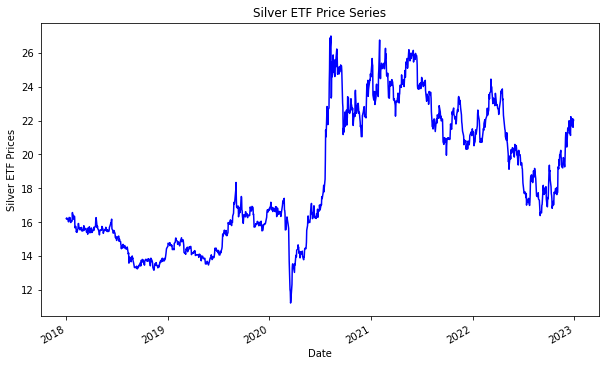

                               Close
Date                                
2018-01-02 00:00:00-05:00  16.209999
2018-01-03 00:00:00-05:00  16.170000
2018-01-04 00:00:00-05:00  16.230000
2018-01-05 00:00:00-05:00  16.219999
2018-01-08 00:00:00-05:00  16.150000


In [3]:
#Downloading and plotting the daily prices of Silver for the last 5 years
Dfs = yf.download('SLV', '2018-01-01', '2023-01-01', auto_adjust = True)

Dfs = Dfs[['Close']] #selecting only the closing prices

Dfs = Dfs.dropna() #dropping the missing values

Dfs.Close.plot(figsize=(10, 6), color= 'b')
plt.ylabel("Silver ETF Prices")
plt.title("Silver ETF Price Series")
plt.show()
print(Dfs.head())

In [6]:
#Merging both the dataframes into one dataframe
df = pd.concat([Dfs,Dfg], axis =1)
df.columns = ['Silver', 'Gold']
df.head()

,Silver,Gold
Date,,
2018-01-02 00:00:00-05:00,16.209999,125.150002
2018-01-03 00:00:00-05:00,16.170000,124.820000
2018-01-04 00:00:00-05:00,16.230000,125.459999
2018-01-05 00:00:00-05:00,16.219999,125.330002
2018-01-08 00:00:00-05:00,16.150000,125.309998


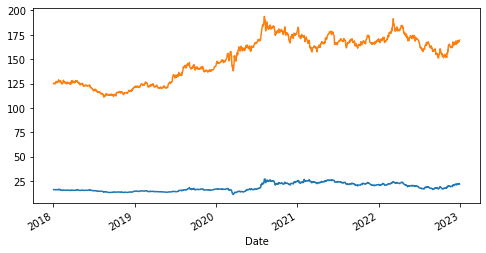

In [7]:
#Plotting the two time series
%matplotlib inline
df.Silver.plot(figsize=(8,4))
df.Gold.plot(figsize=(8,4))
plt.show()

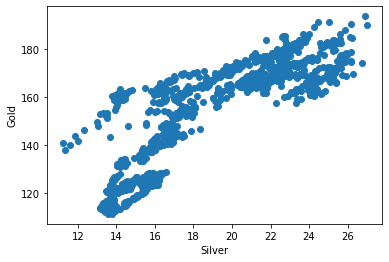

In [19]:
#Plotting the scatter plot of the two time series
plt.scatter(df.Silver, df.Gold)
plt.xlabel('Silver')
plt.ylabel('Gold')
plt.show()

In [8]:
#Calculating hedge ratio
model = sm.OLS(df.Silver, df.Gold)
model = model.fit()
print(model.params[0])

0.12314144218385463


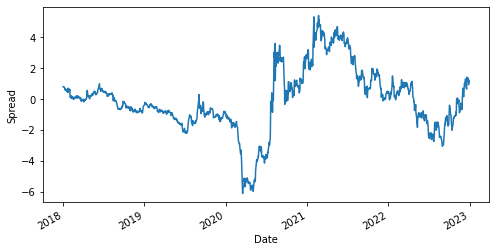

In [9]:
#Plotting the spread
df['spread'] = df.Silver - model.params[0] * df.Gold

df.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

Looking at the above plot we can assume that the spread is not mean rebooting. So the spread is not stationary in nature.

In [23]:
#Performing the Augmented Dickey-Fuller test on the spread
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df.spread, maxlag= 12)
adf[0]

-1.992764361574309

In [11]:
adf[4]

{'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}

Looking at the ADF value of the spread we can safely assume that the spread is not stationary. 

In [14]:
#Calculating the correlation coefficient
np.corrcoef(df.Silver, df.Gold)

array([[1.        , 0.86124191],
       [0.86124191, 1.        ]])

In [16]:
#Creating a function for automatic stationarity test
def stationarity(a, cutoff = 0.05):
  a = np.ravel(a)
  if adfuller(a)[1] < cutoff:
    print('The series is stationary')
    print('p-value = ', adfuller(a)[1])
  else:
    print('The series is NOT stationary')
    print('p-value = ', adfuller(a)[1])

#Testing stationarity of the two time series and the spread
stationarity(df.Gold)
stationarity(df.Silver)
stationarity(df.spread)

The series is NOT stationary
p-value =  0.679472031889975
The series is NOT stationary
p-value =  0.5251094409267807
The series is NOT stationary
p-value =  0.13850501550436112


In [17]:
#Creating a function for automatic cointegration test
def cointegration(a, b):
  if st.coint(a, b)[1] < 0.05:
    print('The series are cointegrated')
    print('p-value = ', st.coint(a, b)[1])
  else:
    print('The series are NOT cointegrated')
    print('p-value = ', st.coint(a, b)[1])

#Testing cointegration of the two time series
cointegration(df.Gold, df.Silver)

The series are NOT cointegrated
p-value =  0.6274225310337795


From the above ADF test we can conclude that both the series are not stationary in nature. 

The cointegrarion test on the Gold series with Silver gives us the conclution that they are not Cointegrated based on the p-value which is less than the chosen cut-off of 5%.